# King-Rook-vs-King
This dataset is a chess database for King & Rook vs King endgames.

* Attributes: 
   1. White King file (column)
   2. White King rank (row)
   3. White Rook file
   4. White Rook rank
   5. Black King file
   6. Black King rank
   7. optimal depth-of-win for White in 0 to 16 moves, otherwise drawn
   
   
* To Predict: Optimal Depth of Win


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
columns = ['white-king-file',
          'white-king-rank',
          'white-rook-file',
          'white-rook-rank',
          'black-king-file',
          'black-king-rank',
          'depth-of-win']

In [10]:
df = pd.read_csv('krkopt.data', header=None, names=columns)

In [11]:
df.head()

,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,depth-of-win
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw


# Simple EDA

In [12]:
df.describe()

,white-king-rank,white-rook-rank,black-king-rank
count,28056.000000,28056.000000,28056.000000
mean,1.854006,4.512404,4.451811
std,0.926414,2.282723,2.248387
min,1.000000,1.000000,1.000000
25%,1.000000,3.000000,3.000000
50%,2.000000,5.000000,4.000000
75%,2.000000,6.000000,6.000000
max,4.000000,8.000000,8.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28056 entries, 0 to 28055
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   white-king-file  28056 non-null  object
 1   white-king-rank  28056 non-null  int64 
 2   white-rook-file  28056 non-null  object
 3   white-rook-rank  28056 non-null  int64 
 4   black-king-file  28056 non-null  object
 5   black-king-rank  28056 non-null  int64 
 6   depth-of-win     28056 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


In [14]:
df.dtypes

white-king-file    object
white-king-rank     int64
white-rook-file    object
white-rook-rank     int64
black-king-file    object
black-king-rank     int64
depth-of-win       object
dtype: object

# Finding Missing/Null

In [15]:
df.isnull().sum()

white-king-file    0
white-king-rank    0
white-rook-file    0
white-rook-rank    0
black-king-file    0
black-king-rank    0
depth-of-win       0
dtype: int64

No Null Values

In [16]:
df.isin(['?']).sum()

white-king-file    0
white-king-rank    0
white-rook-file    0
white-rook-rank    0
black-king-file    0
black-king-rank    0
depth-of-win       0
dtype: int64

No Missing Values

# Finding Duplicates

In [18]:
df.duplicated().sum()

0

No Duplicate Samples

# Checking Unique Values of Columns

In [19]:
for col in df.columns:
    print(col, ': ', df[col].unique())

white-king-file :  ['a' 'b' 'c' 'd']
white-king-rank :  [1 2 3 4]
white-rook-file :  ['b' 'c' 'd' 'e' 'f' 'g' 'h' 'a']
white-rook-rank :  [3 1 2 4 5 6 7 8]
black-king-file :  ['c' 'd' 'e' 'f' 'g' 'h' 'a' 'b']
black-king-rank :  [2 1 3 4 5 6 7 8]
depth-of-win :  ['draw' 'zero' 'one' 'two' 'three' 'four' 'five' 'six' 'seven' 'eight'
 'nine' 'ten' 'eleven' 'twelve' 'thirteen' 'fourteen' 'fifteen' 'sixteen']


There are no abnormal values in any columns

# Plotting Graph for Value Counts of Each Column

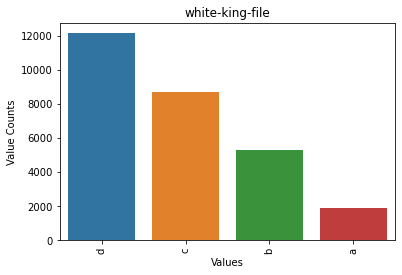

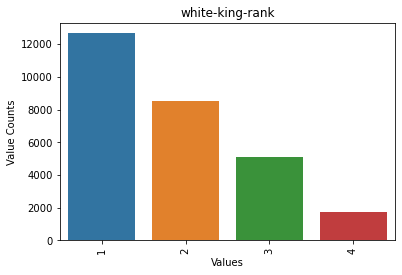

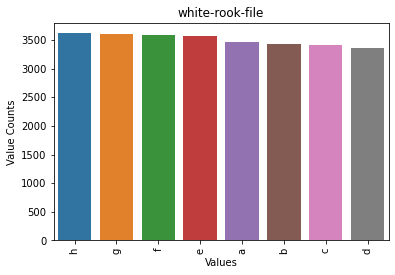

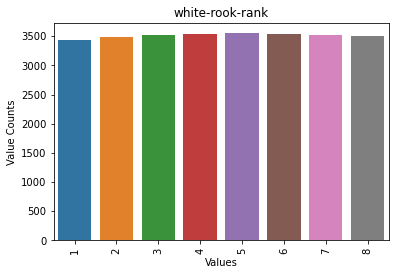

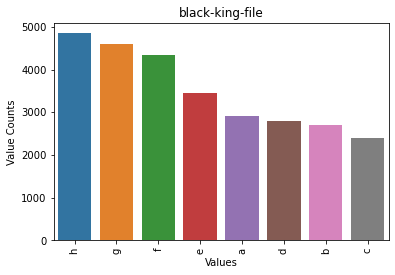

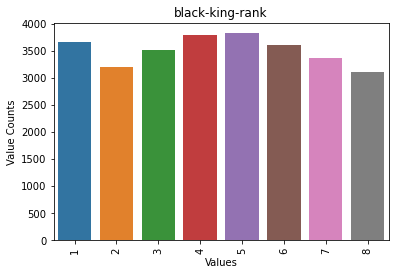

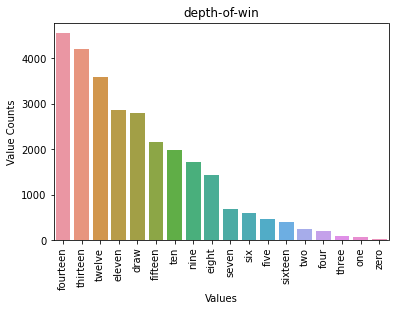

In [20]:
for col in df.columns:
    val_counts = df[col].value_counts()
    ind = val_counts.index
    val = val_counts.values
    sns.barplot(x=ind, y=val)
    plt.title(col)
    plt.ylabel('Value Counts')
    plt.xlabel('Values')
    plt.xticks(rotation=90)
    plt.show()

# Encoding Target Variable

In [21]:
target_encoded = {
    'draw': -1,
    'sixteen' : 16,
    'fifteen' : 15,
    'fourteen' : 14,
    'thirteen' : 13,
    'twelve' : 12,
    'eleven' : 11,
    'ten' : 10,
    'nine' : 9,
    'eight' : 8,
    'seven' : 7,
    'six' : 6,
    'five' : 5,
    'four' : 4,
    'three' : 3,
    'two' : 2,
    'one' : 1,
    'zero' : 0
}

In [23]:
df['depth-of-win'].replace(target_encoded, inplace=True)
df['depth-of-win'] = df['depth-of-win'].astype(np.int64)

In [24]:
df['depth-of-win'].unique()

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16], dtype=int64)

# Developing Model

In [25]:
X = df.drop('depth-of-win', axis=1)
y = df['depth-of-win']

## Encoding the independent features